In [1]:
import numpy as np                           # To help with linear algebra
import os                                   
from sklearn.metrics import confusion_matrix # Provides various classification, regression, and clustering algorithms
import seaborn as sn                         # To provide a heatmap
from sklearn.utils import shuffle            # To help shuffle the data
import matplotlib.pyplot as plt              # 2D plotting library
import cv2                                   # Image processing library
import tensorflow as tf                      # Deep learning library for building models like neural networks.

In [ ]:

# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6 #Number of classes

In [3]:
#Mounting the Google Drive file system to access the dataset.
import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path ='/content/drive/My Drive'

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
def load_data(): #Loading the Image Dataset 
    datasets = ['intelic/seg_train/seg_train', 'intelic/seg_test/seg_test']
    size = (150,150) #Specifying the size for the images to keep consistency
    output = []
    for dataset in datasets:
        directory = dataset
        images = []
        labels = []
        for folder in os.listdir(directory): #Iterating through each folder
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder)[:500]: #Iterating through each file in the folder
                img_path = directory + "/" + folder + "/" + file 
                #Open and resize the image 
                curr_img = cv2.imread(img_path) 
                curr_img = cv2.resize(curr_img, size)
                #Append the image and labels to the output
                images.append(curr_img) 
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     #Shuffling the data to avoid the model from learning any bias or pattern based on the order of images
        #Using numpy makes it easier to process and manipulate the arrays 
        images = np.array(images, dtype = 'float32') #Our images
        labels = np.array(labels, dtype = 'int32')   #Our labels
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [7]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 3000
Number of testing examples: 2911
Each image is of size: (150, 150, 3)


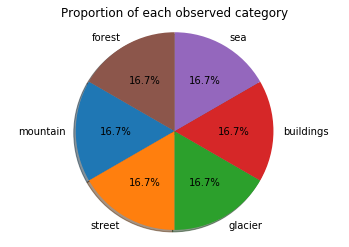

In [8]:
# Plot a pie chart
sizes = np.bincount(train_labels) #Data being plotted showing the proportion of the data 
explode = (0, 0, 0, 0, 0, 0)  #How much section of the pie chart should be separated, 0 means connected
plt.pie(sizes, explode=explode, labels=class_names,autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal') #Makes sure the chart is a circle instead of eclipse
plt.title('Proportion of each observed category')

plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

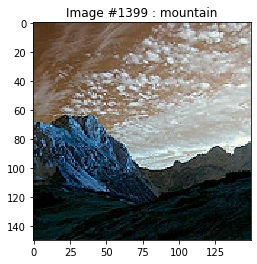

In [10]:
#This code randomly selects and displays an image from a dataset along with its corresponding label
#Done to verify the data was loaded correctly 
index = np.random.randint(train_images.shape[0])
plt.figure() #Creating a window figure for the image 
plt.imshow(train_images[index]) #Displaying the selected image
plt.grid(False) #Removing the grid lines from the image 
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

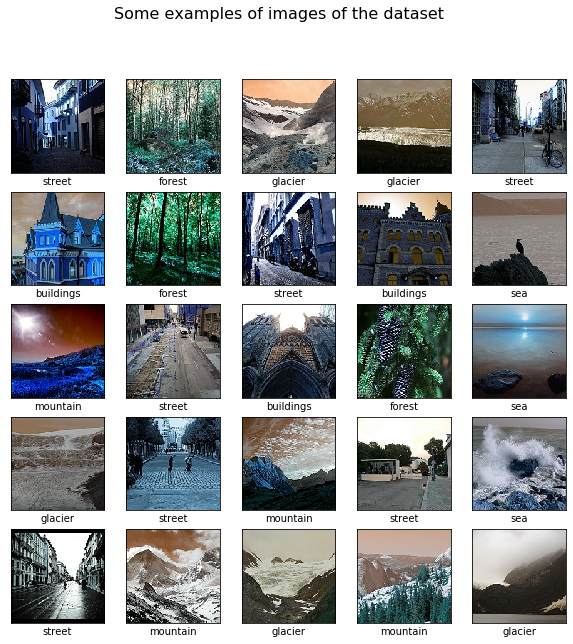

In [11]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1) #Subplot with 5x5 grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #Removing tick marks and grid lines
    plt.imshow(train_images[i], cmap=plt.cm.binary) #Holds the set of images in the dataset and displays it
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([  #Sequential model object to stack layers of the neural network.
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # Convolution is an operation that helps neural networks extract important features from images. 
    tf.keras.layers.MaxPooling2D(2,2), #This layer downsamples the output of the previous convolutional layer by taking the maximum value in each 2x2 region.
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), # Adds another convolutional layer - relu makes all the negative values in the input tensor to 0 and keeps all non-negative values as they are.
    tf.keras.layers.MaxPooling2D(2,2), #Done to extract the most important features and discard the less important ones. 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), #Adds a fully connected layer to the model with 128 neurons
    tf.keras.layers.Dense(6, activation=tf.nn.softmax) #Adds another fully connected layer to the model with 6 neurons
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, 
                    batch_size=128, # The number of samples to use in each batch during training.
                    epochs=10, # The number of times to iterate over the entire training dataset.
                    validation_split = 0.2) #The fraction of the training data to use for validation during training. In this case, 20% of the training data will be used for validation.

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 56s 23ms/sample - loss: 2.3482 - acc: 0.1838 - val_loss: 1.7583 - val_acc: 0.3217
Epoch 2/10
2400/2400 [==============================] - 55s 23ms/sample - loss: 1.4738 - acc: 0.4242 - val_loss: 1.2647 - val_acc: 0.5267
Epoch 3/10
2400/2400 [==============================] - 54s 23ms/sample - loss: 1.0935 - acc: 0.5929 - val_loss: 1.1279 - val_acc: 0.5533
Epoch 4/10
2400/2400 [==============================] - 54s 23ms/sample - loss: 0.8981 - acc: 0.6704 - val_loss: 0.9875 - val_acc: 0.6300
Epoch 5/10
2400/2400 [==============================] - 54s 23ms/sample - loss: 0.7330 - acc: 0.7367 - val_loss: 0.9744 - val_acc: 0.6267
Epoch 6/10
2400/2400 [==============================] - 54s 23ms/sample - loss: 0.6178 - acc: 0.7892 - val_loss: 0.9290 - val_acc: 0.6450
Epoch 7/10
2400/2400 [==============================] - 55s 23ms/sample - loss: 0.4829 - acc: 0.8379 - val_loss: 0.9095 - val

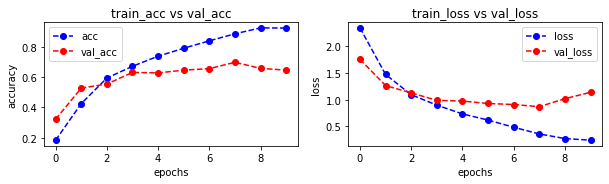

In [14]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--', label = "acc")
plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [15]:
test_loss = model.evaluate(test_images, test_labels)

2911/2911 [==============================] - 19s 6ms/sample - loss: 1.0523 - acc: 0.6740


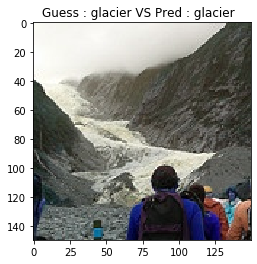

In [16]:
#Selecting a random image from the test set and using the model to make a prediction on it.
index = np.random.randint(test_images.shape[0]) # We choose a random index
img = (np.expand_dims(test_images[index], 0)) #expand the image array to match the expected input shape of the model.
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # Used to find the class with the highest probability.

#Displaying the image
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 
title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )
plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):# Printing 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    BOO = (test_labels == pred_labels) #Boolean array
    mislabeled_indices = np.where(BOO == 0) #Used to find the indices of the mislabeled images where BOO equals 0.
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    
    #Showing the failed test cases
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()


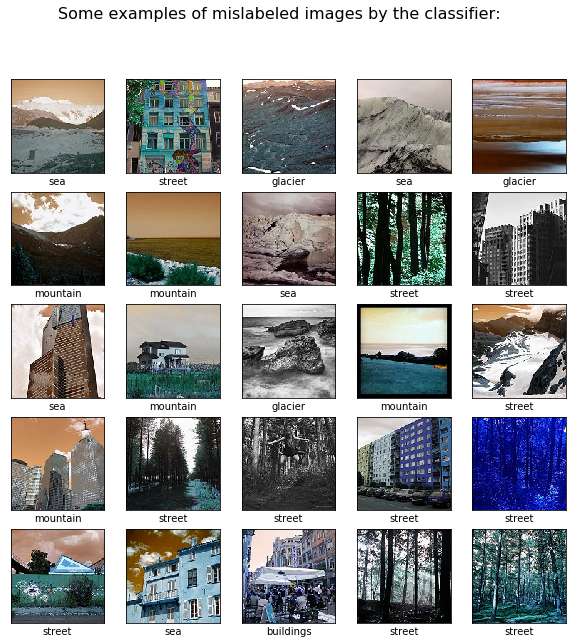

In [18]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)